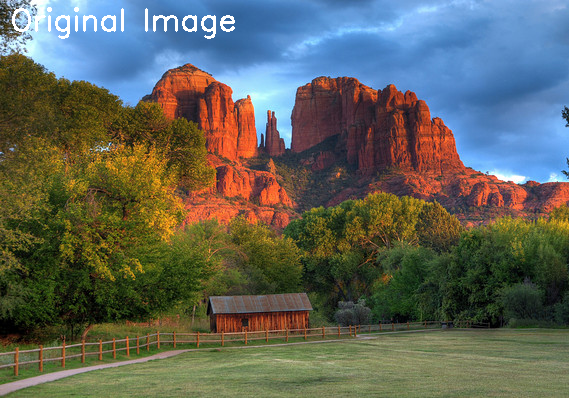

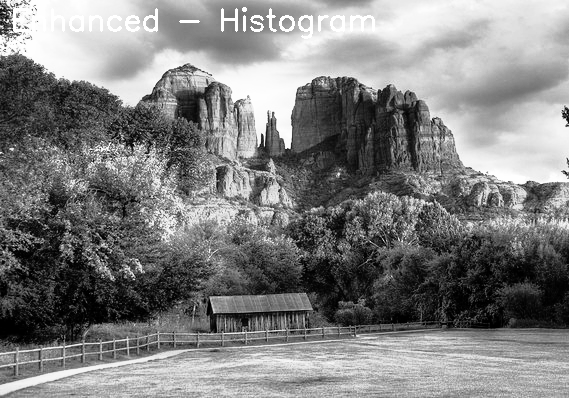

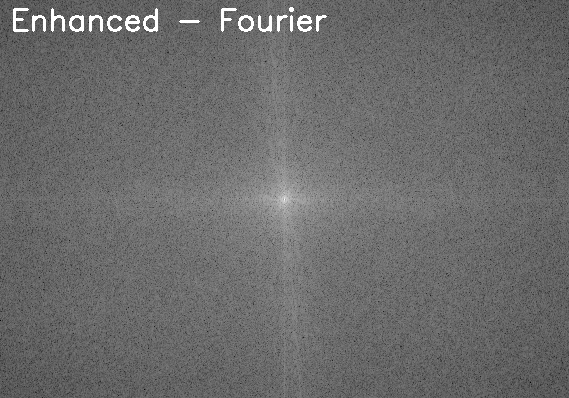

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

def histogram_equalization(image):
    # Menghitung histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Menormalisasi histogram
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Melakukan ekualisasi histogram
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Menerapkan transformasi histogram ke citra
    image_equalized = cdf[image]

    return image_equalized

def fourier_transform(image):
    # Melakukan transformasi Fourier
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Melakukan normalisasi untuk visualisasi
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return magnitude_spectrum

# Membaca citra
image_path = 'ref6.jpg'
original_image = cv2.imread(image_path)

# Menerapkan histogram equalization
enhanced_image_hist = histogram_equalization(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY))

# Menerapkan transformasi Fourier
enhanced_image_fourier = fourier_transform(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY))

# Menambahkan teks pada setiap citra
cv2.putText(original_image, 'Original Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2.putText(enhanced_image_hist, 'Enhanced - Histogram', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2.putText(enhanced_image_fourier, 'Enhanced - Fourier', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Menampilkan citra hasil
cv2_imshow(original_image)
cv2_imshow(enhanced_image_hist)
cv2_imshow(enhanced_image_fourier)


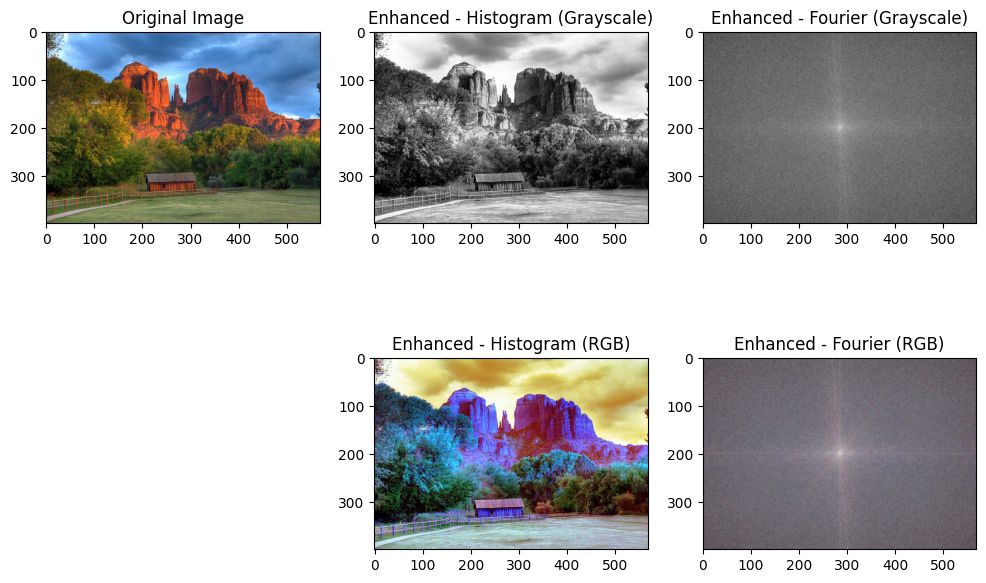

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Menghitung histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Menormalisasi histogram
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Melakukan ekualisasi histogram
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Menerapkan transformasi histogram ke citra
    image_equalized = cdf[image]

    return image_equalized

def fourier_transform(image):
    # Melakukan transformasi Fourier
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Melakukan normalisasi untuk visualisasi
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return magnitude_spectrum

# Membaca citra
image_path = 'ref6.jpg'
original_image = cv2.imread(image_path)

# Mengubah citra menjadi grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Menerapkan histogram equalization
enhanced_image_hist = histogram_equalization(gray_image)

# Menerapkan transformasi Fourier
enhanced_image_fourier = fourier_transform(gray_image)

# Menampilkan citra hasil
plt.figure(figsize=(12, 12))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Histogram Equalization - Grayscale
plt.subplot(3, 3, 2)
plt.imshow(enhanced_image_hist, cmap='gray')
plt.title('Enhanced - Histogram (Grayscale)')

# Fourier Transform - Grayscale
plt.subplot(3, 3, 3)
plt.imshow(enhanced_image_fourier, cmap='gray')
plt.title('Enhanced - Fourier (Grayscale)')

# Histogram Equalization - RGB
enhanced_image_hist_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
enhanced_image_hist_rgb[:,:,0] = histogram_equalization(original_image[:,:,0])
enhanced_image_hist_rgb[:,:,1] = histogram_equalization(original_image[:,:,1])
enhanced_image_hist_rgb[:,:,2] = histogram_equalization(original_image[:,:,2])

plt.subplot(3, 3, 5)
plt.imshow(enhanced_image_hist_rgb)
plt.title('Enhanced - Histogram (RGB)')

# Fourier Transform - RGB
enhanced_image_fourier_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
enhanced_image_fourier_rgb[:,:,0] = fourier_transform(original_image[:,:,0])
enhanced_image_fourier_rgb[:,:,1] = fourier_transform(original_image[:,:,1])
enhanced_image_fourier_rgb[:,:,2] = fourier_transform(original_image[:,:,2])

plt.subplot(3, 3, 6)
plt.imshow(enhanced_image_fourier_rgb)
plt.title('Enhanced - Fourier (RGB)')

plt.show()


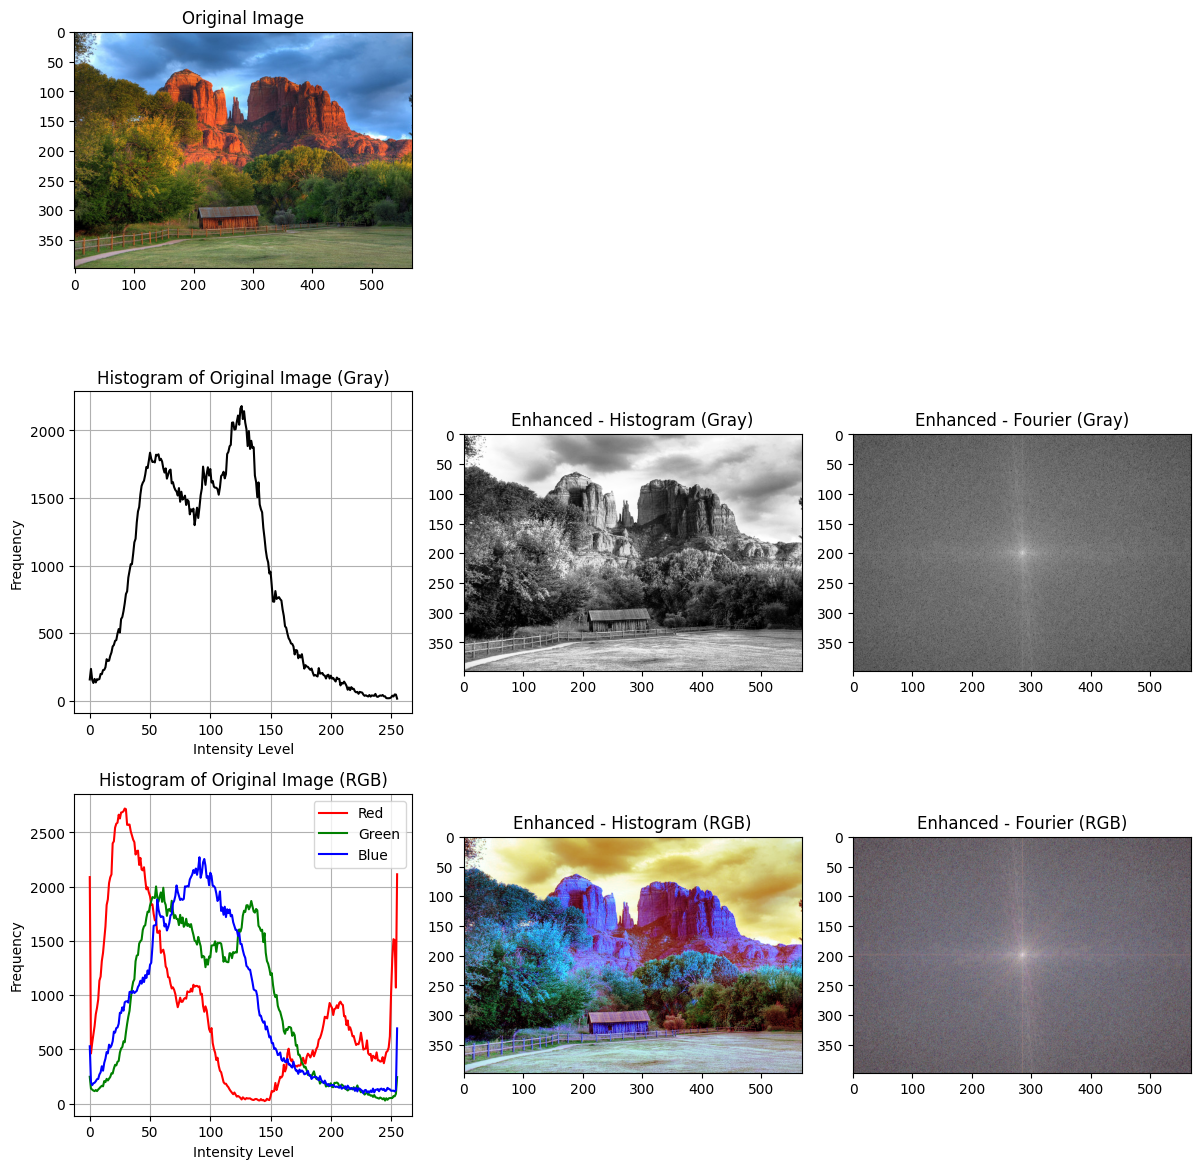

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Menghitung histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Menormalisasi histogram
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Melakukan ekualisasi histogram
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Menerapkan transformasi histogram ke citra
    image_equalized = cdf[image]

    return image_equalized, hist

def fourier_transform(image):
    # Melakukan transformasi Fourier
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Melakukan normalisasi untuk visualisasi
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return magnitude_spectrum

# Membaca citra
image_path = 'ref6.jpg'
original_image = cv2.imread(image_path)

# Mengubah citra menjadi grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Menerapkan histogram equalization
enhanced_image_hist, hist = histogram_equalization(gray_image)

# Menerapkan transformasi Fourier
enhanced_image_fourier = fourier_transform(gray_image)

# Menerapkan histogram equalization pada setiap saluran warna untuk citra RGB
enhanced_image_hist_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
enhanced_image_hist_rgb[:,:,0], hist_r = histogram_equalization(original_image[:,:,0])
enhanced_image_hist_rgb[:,:,1], hist_g = histogram_equalization(original_image[:,:,1])
enhanced_image_hist_rgb[:,:,2], hist_b = histogram_equalization(original_image[:,:,2])

# Menerapkan transformasi Fourier pada setiap saluran warna untuk citra RGB
enhanced_image_fourier_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
enhanced_image_fourier_rgb[:,:,0] = fourier_transform(original_image[:,:,0])
enhanced_image_fourier_rgb[:,:,1] = fourier_transform(original_image[:,:,1])
enhanced_image_fourier_rgb[:,:,2] = fourier_transform(original_image[:,:,2])

# Menampilkan citra hasil dan histogram
plt.figure(figsize=(16, 12))

# Citra Asli
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Histogram Citra Asli - Grayscale
plt.subplot(3, 4, 5)
plt.plot(hist, color='black')
plt.title('Histogram of Original Image (Gray)')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.grid(True)

# Citra Hasil Histogram Equalization - Grayscale
plt.subplot(3, 4, 6)
plt.imshow(enhanced_image_hist, cmap='gray')
plt.title('Enhanced - Histogram (Gray)')

# Transformasi Fourier - Grayscale
plt.subplot(3, 4, 7)
plt.imshow(enhanced_image_fourier, cmap='gray')
plt.title('Enhanced - Fourier (Gray)')

# Histogram Citra Asli - RGB
plt.subplot(3, 4, 9)
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.title('Histogram of Original Image (RGB)')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Citra Hasil Histogram Equalization - RGB
plt.subplot(3, 4, 10)
plt.imshow(enhanced_image_hist_rgb)
plt.title('Enhanced - Histogram (RGB)')

# Transformasi Fourier - RGB
plt.subplot(3, 4, 11)
plt.imshow(enhanced_image_fourier_rgb)
plt.title('Enhanced - Fourier (RGB)')

plt.tight_layout()
plt.show()
